In [1]:
import numpy as np
import cv2
from os.path import join, exists
import pickle
import matplotlib.pyplot as plt
IMAGES_FOLDER_PATH="../test_images"

In [2]:
def convert_img2patch(im,patchSize, intervalSize, boundarySize):
    
    temp = np.arange(-patchSize, patchSize+1)
    p_xx,p_yy = np.meshgrid(temp, temp)
    
    nDim = p_xx.size
    
    height, width = im.shape
    
    temp_x = np.arange(boundarySize+1,width-boundarySize+1,intervalSize)
    temp_y = np.arange(boundarySize+1,height-boundarySize+1,intervalSize)
    
    grid_xx, grid_yy = np.meshgrid(temp_x,temp_y)
    p_xx = np.ravel(p_xx.T)
    p_yy = np.ravel(p_yy.T)
    grid_xx = np.ravel(grid_xx.T)
    grid_yy = np.ravel(grid_yy.T)
    
    nPatches = grid_xx.size
    
    print(nDim, nPatches)
    
    xx = np.zeros((nPatches,nDim))
    yy = np.zeros((nPatches,nDim))
    
    xx += p_xx 
    xx = xx.T
    xx += grid_xx
    xx = np.ravel(xx).astype(np.uint8)
    
    yy += p_yy 
    yy = yy.T
    yy += grid_yy
    yy = np.ravel(yy).astype(np.uint8)
    
    idx = yy  + (xx - 1) * height
    n = idx.size
    print(idx[:5])
#     idx = idx - 1
    
    im = np.ravel(im.T)
    
    print(im[idx[:5]])
    patches = np.reshape(im[idx],(nDim,nPatches))
    patches = patches.T
    
    return patches

In [3]:
def im2patchesN(image, patchSize, interval_size):
    boundary_size = patchSize
    mask = []
    
    patch_r = im2patches(image[:,:,0], patchSize, interval_size, mask, boundary_size)
    
    nh,num_samples= patch_r.shape
    patches = np.zeros((nh, num_samples*num_dims))
    
    patches[:,:num_samples] = patch_r
    
    patch_g = im2patches(image[:,:,1], patchSize, interval_size, boundary_size)
    patches[:,num_samples:2*num_samples] = patch_g

    patch_b = im2patches(image[:,:,2], patchSize, interval_size, boundary_size)
    patches[:,2*num_samples:] = patch_b

    return patches

In [4]:
img1=cv2.imread(join(IMAGES_FOLDER_PATH,"taj_mahal.png"))
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

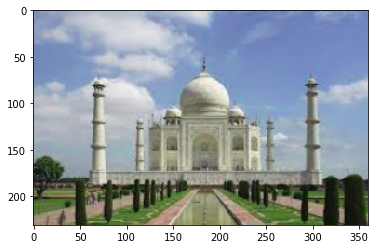

In [5]:
plt.imshow(img1)
plt.show()

In [26]:
# img = np.array([[10,20,30,40,50,60,70,80],[11,21,31,41,51,61,71,81],[10,20,30,40,50,60,70,80],[10,20,30,40,50,60,70,80],[11,21,31,41,51,61,71,81]])
# im = cv2.imread('singapore.jpg')


In [30]:
a = convert_img2patch(img1[:,:,2],2, 3, 2)


25 9044
[ 1  4  7 10 13]
[181 190 198 188 183]
